<center>
    <h1> INF393 - Maquinas de Aprendizaje  </h1>
    <h2> Tarea 2: Métodos Lineales para Clasificación </h2>
    <h5> Alumnos: Ignacio Espinoza & Daniel Rivera</h5>
</center>

 

<h2>Python: Dependencias</h2>


In [1]:
%matplotlib inline
import urllib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy


train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"


/home/nacho/.local/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/nacho/.local/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


<h2> PARTE 3:  Skill Prediction en LinkedIN </h2>

<h5> (a) Defina una función que lea el primer archivo y genere una matriz dispersa $Z$, de forma $n × d$ donde $n$ es el número de perfiles de LinkedIn  y $d$ es el número de competencias totales. </h5>


In [2]:
from scipy.sparse import csr_matrix

def get_sparse_matrix(file_name):
   user_skill = open(file_name, 'r')

   print("..creating sparse matrix...")
   sparse_matrix = np.zeros((7890,14544))

   for line in user_skill:
      line = line.split(':')
      user = int(line[0]) 
      skills = line[1].split(',')
      for skill in skills:
         sparse_matrix[user][int(skill)] = 1 

   user_skill.close()
   print("...creating csr sparse matrix...")
   #MemoryError :(
   #csr_sparse_matrix = csr_matrix(sparse_matrix)
   print("...sparse matrix finished...")
   return sparse_matrix

sparse_matrix = get_sparse_matrix('user_skill')
print sparse_matrix 

..creating sparse matrix...
...creating csr sparse matrix...
...sparse matrix finished...
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


<h5>(b) Construya sub-matrices de entrenamiento y prueba. Los conjuntos de entrenamiento y pruebas deben ser disjuntos y además $n_tr + n_ts = n$. Elija aleatoriamente
los casos de entrenamiento y pruebas, permutando por ejemplo las filas de $X$ antes de la selección. </h5>
<p> El criterio de partición es seleccionar un 70% del dataset como un set de entrenamiento y el 30% restante como set de pruebas. Es importante observar que dado que hay un orden aleatorio de los datos previo, es probable que en uno de los set de entreneamiento un skill quede sin usuario que lo reclame. Esto puede traer consecuencias en el desempeño de ciertos algoritmos de clasificación </p>

In [3]:
def get_training_testing_set(sparse_matrix):
   #np.random.shuffle(sparse_matrix)

   training_set = sparse_matrix[:5523][:]
   
   testing_set =  sparse_matrix[5523:][:]

   return training_set, testing_set

<h5>(c) Construya un gráfico que muestre el número de usuarios que declaran cada competencia. Deberá elegir
un tipo de gráfico apropiado que haga completamente legible la información que se desea obtener.</h5>

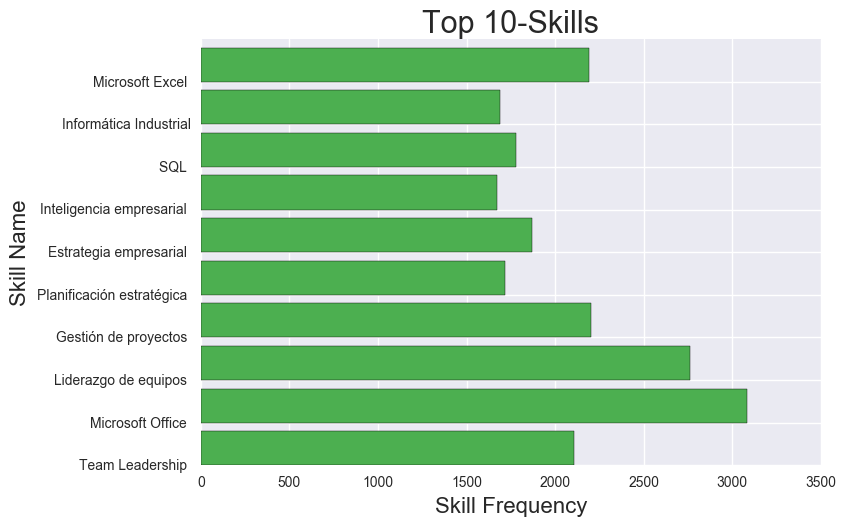

In [4]:
def get_skill_dictionary(file_name):

   skill_dict = {}
   skill_id_file = open(file_name, 'r')

   for line in skill_id_file:
      line = line.split(':')
      skill_name = str(line[0]).decode("utf-8")
      skill_id = str(line[1]).decode("utf-8")
      skill_dict[skill_id] = skill_name

   skill_id_file.close()
   
   return skill_dict

def plot_skills(sparse_matrix, minimum):

   skill_id = get_skill_dictionary('skill_id')
   skills_y = np.sum(sparse_matrix , axis = 0)
   skills_x = np.arange(14544)
   count = 0

   y = []
   x = []
   labels = []

   for i in range(14544):
      if skills_y[i] >= minimum:
         count += 1
         labels.append(skill_id[str(skills_x[i]) +'\n'].encode("utf-8"))
         y.append(skills_y[i])

   x = np.arange(count)     
   plt.barh(x, y,color="#4CAF50")
   for l in range(0,len(labels)):
      labels[l] = labels[l].decode("utf-8")
   
   labels[8] = "Informática Industrial".decode("utf-8")

   plt.yticks(x, labels, rotation = 'horizontal')
   plt.title("Top " + str(count) +"-Skills",fontsize=22)
   plt.xlabel("Skill Frequency",fontsize= 16)
   plt.ylabel("Skill Name",fontsize= 16)
   plt.show()

plot_skills(sparse_matrix, 1650)

<img src="top50_skills.png">

<p>Para la creación de estos gráficos se siguieron los siguientes criterios: La base de datos revela que hay mas de 10000 skills con una frecuencia menor a 50 , por lo que se decide descartar la mayoria de estos skills para gráficar, dado que se buscan las aptitudes mas releantes.Tambien se observa que el archivo posee unos skills que no están bien procesados, tales como:</p>

$Python data-recipient-ID="398986940"><span class="skill-pill"><span class="endorse-count"><span class="num-endorsements" data-count="0">0</span></span><span :562$

<p> Estos nombres de skills no revelan suficiente información y aparecen con una frecuencia a veces inferior a 5. Esto es tambien un criterio para eliminar o descartar </p>

<p> Como se observa tanto en el gráfico de barra de los top-10 y el wordcloud generado a continuación, la mayoria de los tags mas frecuentse están relacionados con el área industrial o del área de gestión. Con menor frecuencia en segundo lugar le siguen áreas mas técnicas del área de informatica, tales como javascript, PHP, SQL, etc.</p>

In [7]:
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
from pytagcloud.colors import COLOR_SCHEMES

def get_word_cloud(sparse_matrix):
   skill_id = get_skill_dictionary('skill_id')
   skills_y = np.sum( sparse_matrix , axis = 0)
   skills_x = np.arange(14544)
   count = 0

   y = []
   x = []
   labels = []
   for i in range(14544):
      if skills_y[i] >=  1500 :
         count += 1
         labels.append(skill_id[str(skills_x[i]) +'\n'].encode("utf-8"))
         y.append(skills_y[i])

   x = np.arange(count)     
   
   for l in range(0,len(labels)):
      labels[l] = labels[l].decode("utf-8")

   text = ""

   for i in range(0,len(labels)):
      label = labels[i].replace("Microsoft","",1)
      label = label.title().replace(" ","") + " "
      text = text +  label*int(y[i]) + " "

   tags = make_tags(get_tag_counts(text), maxsize = 60, colors = COLOR_SCHEMES['audacity'])
 
   create_tag_image(tags, 'cloud_large.png', size = (1400,1200), background=(0, 0, 0, 255))

#get_word_cloud(sparse_matrix)

<img src="cloud_large2.png"/>

<h5>(d) Elija una competencia $j ∈ {1, . . . , d}$ (por ejemplo PHP ). Su objetivo será predecir la existencia de esta competencia en un perfil a partir de las demás competencias declaradas por el usuario</h5>

In [11]:
def create_training_dataset(training_set,index):

   y = training_set[:,index]
   X_std_train = StandardScaler().fit_transform(training_set)
   X_std_train = np.delete(training_set,index,1)

   return X_std_train,y

def create_test_dataset(testing_set,index):

   y_test = testing_set[:,index]
   X_std_test = StandardScaler().fit_transform(testing_set)
   X_std_test = np.delete(testing_set,index,1)

   return X_std_test,y_test

training_set, testing_set = get_training_testing_set(sparse_matrix)
#Prevent Memory Error
#training_set = training_set[:2500][:]
#testing_set = testing_set[:2200][:]
#Prevent Memory Error
X_std_train, y_train = create_training_dataset(training_set,55)
X_std_test, y_test = create_test_dataset(testing_set,55)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report



<p>Para este análisis se usó el skill $SQL$ como la columna que será analizada. La razón principal es debido que es pertenciente al top 10 de frecuencia, y se estima que los resultados serán óptimos. Los algoritmos implementados fueron: <b>MultinomialNB, BernoulliNB, LinearSVC, LogisticRegression y KN Classifier.  </b> </p>

<b>Importante: </b> Dada las limitaciones del pc con el cual se implementaron estos algoritmos, se redujo el dataset de entrenamiento y de prueba para lograr visualizar los resultados y no tener errores de memoria. 

In [12]:
def get_MultinomialNB_performance(X_std_train,y_train,X_std_test,y_test):
    multinomial_model = MultinomialNB()
    multinomial_model.fit(X_std_train, y_train)
    print "SCORE: " + str(multinomial_model.score(X_std_test,y_test))
    print classification_report(y_train, multinomial_model.predict(X_std_train), target_names=['0','1'])

get_MultinomialNB_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.836079425433
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      4300
          1       0.67      0.79      0.72      1223

avg / total       0.88      0.87      0.87      5523



In [13]:
def get_BernoulliNB_performance(X_std_train,y_train,X_std_test,y_test):
    bernoulli_model = BernoulliNB()
    bernoulli_model.fit(X_std_train , y_train)
    print "SCORE: " + str(bernoulli_model.score(X_std_test,y_test))
    print classification_report(y_train, bernoulli_model.predict(X_std_train), target_names=['0','1'])


get_BernoulliNB_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.841571609632
             precision    recall  f1-score   support

          0       0.91      0.92      0.91      4300
          1       0.70      0.68      0.69      1223

avg / total       0.86      0.87      0.87      5523



In [14]:
def get_LogisticRegression_performance(X_std_train,y_train,X_std_test,y_test):
    logistic_model = LogisticRegression()
    logistic_model.fit(X_std_train , y_train)
    print "SCORE: " + str(logistic_model.score(X_std_test,y_test))
    print classification_report(y_train, logistic_model.predict(X_std_train), target_names=['0','1'])


get_LogisticRegression_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.881284326151
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      4300
          1       0.94      0.88      0.91      1223

avg / total       0.96      0.96      0.96      5523



In [15]:
def get_LinearSVD_performance(X_std_train,y_train,X_std_test,y_test):
    linearsvd_model = LinearSVC()
    linearsvd_model.fit(X_std_train , y_train)
    print "SCORE: " + str(linearsvd_model.score(X_std_test,y_test))
    print classification_report(y_train, linearsvd_model.predict(X_std_train), target_names=['0','1'])


get_LinearSVD_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.855935783692
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4300
          1       0.98      0.96      0.97      1223

avg / total       0.99      0.99      0.99      5523



In [16]:
def get_KNeighborsClassifier_performance(X_std_train,y_train,X_std_test,y_test):
    knc_model = KNeighborsClassifier()
    knc_model.fit(X_std_train , y_train)
    print "SCORE: " + str(knc_model.score(X_std_test,y_test))
    print classification_report(y_train, knc_model.predict(X_std_train), target_names=['0','1'])


get_KNeighborsClassifier_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.837769328264
             precision    recall  f1-score   support

          0       0.89      0.97      0.93      4300
          1       0.83      0.60      0.69      1223

avg / total       0.88      0.88      0.88      5523



<h1> Otro Skill: Javascript </h1>

In [17]:
X_std_train, y_train = create_training_dataset(training_set,1835)
X_std_test, y_test = create_test_dataset(testing_set,1835)

get_MultinomialNB_performance(X_std_train,y_train,X_std_test,y_test)

get_BernoulliNB_performance(X_std_train,y_train,X_std_test,y_test)

get_LogisticRegression_performance(X_std_train,y_train,X_std_test,y_test)

get_LinearSVD_performance(X_std_train,y_train,X_std_test,y_test)

#get_KNeighborsClassifier_performance(X_std_train,y_train,X_std_test,y_test)

SCORE: 0.982678495986
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      5519
          1       0.00      0.00      0.00         4

avg / total       1.00      0.99      1.00      5523

SCORE: 1.0


/home/nacho/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5519
          1       0.00      0.00      0.00         4

avg / total       1.00      1.00      1.00      5523

SCORE: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5519
          1       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      5523

SCORE: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5519
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      5523

